<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/PowerSwitchingDevices_MOSFET_SingleCell_Animated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Sturctures of Power MOSFETs: Single Cell Animated
</h1></b>

Dr. Bingsen Wang

1/3/2024
</center>

#Python Code
The Python code illustrates the various structure of Single-Cell power MOSFET.

0
1
2
3
4


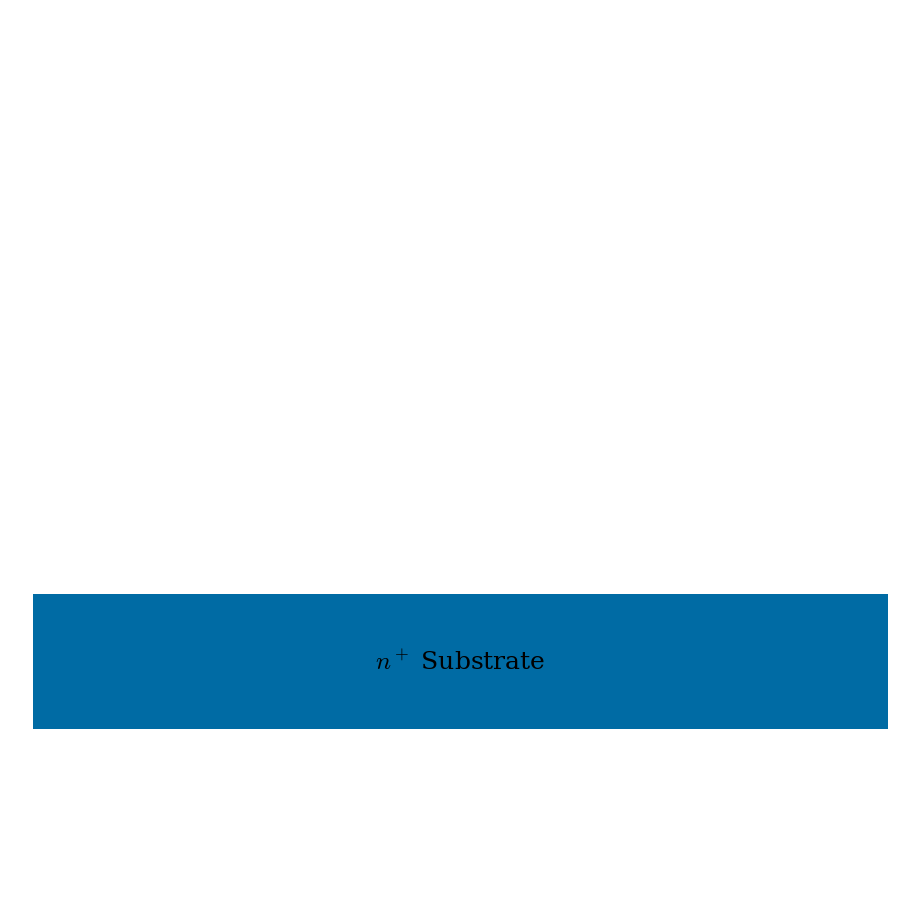

In [41]:
from os import linesep
from numpy import linspace,logspace,exp,log,fft,pi,arccos,cos,heaviside
import matplotlib as mpl
from matplotlib import animation
import matplotlib.patches as mp
from matplotlib.path import Path

mpl.pyplot.rcParams.update({"font.family":"serif", "mathtext.fontset":"cm"})
mpl.rc('animation', html='jshtml')
#color palette
tcb10 = {"darkblue":"#006BA4", "orange":"#FF800E", "lightgray":"#ABABAB",
         "darkgray":"#595959", "blue":"#5F9ED1", "darkorange":"#C85200",
         "gray":"#898989", "lightblue":"#A2C2EC", "lightorange":"#FFBC79",
         "lightgrey":"#CFCFCF"} #tableau color blind 10


def MOSFET1Cell(ax,xy,h,k_epi,k_source,k_body,w,lw,colors,alpha_ter,
                       alpha_m,alpha_b,alpha_s,alpha_epi,alpha_ox):
  x0,y0=xy
  h_sb = .25*h #substrate tickness, not drawn to scale
  h_epi = .75*h*k_epi #expi layer thickness, not drawn to scale
  h_b = .2*h*k_body #body thickness, not drawn to scale
  h_s = 0.5*h_b*k_source #source thickness, not drawn to scale
  h_ox = 0.04*h #oxide thickness, not drawn to scale
  h_m = .3*h_ox #metal thickness, not drawn to scale
  w_b = .4*w #body width, not drawn to scale
  w_s = 0.6*w_b #source width, not drawn to scale
  w_ox = 0.4*w #oxide width, not drawn to scale
  l_t = 0.15*h #termnal length
  r_t = .01*w #terminal circle radius

  c_sb = colors[0] #substrate color
  # c_sb = mpl.colors.to_rgba(colors[0],0.5) #substrate color
  c_epi = colors[4] #epi layer color
  # c_epi = mpl.colors.to_rgba(colors[0],0.2) #epi layer color
  c_b = colors[5] #p-body color
  c_s = c_sb #source color
  c_ox = mpl.colors.to_rgba(colors[8],alpha_ox) #oxide color
  c_m =mpl.colors.to_rgba(colors[-2],alpha_m) #metal color
  c_txt_ter = mpl.colors.to_rgba(colors[-2],alpha_ter) #text color: terminal
  c_txt_epi = mpl.colors.to_rgba(colors[-2],alpha_epi) #text color: epi
  c_txt_b = mpl.colors.to_rgba(colors[-2],alpha_b) #text color: body
  c_txt_s = mpl.colors.to_rgba(colors[-2],alpha_s) #text color: source
  c_ter = mpl.colors.to_rgba(colors[-2],alpha_ter) #terminal color
  ax.add_patch(mp.Rectangle(xy,w,h_sb,ec='none',fc=c_sb)) #substrate
  ax.add_patch(mp.Rectangle((x0,y0+h_sb),w,h_epi,ec='none',fc=c_epi)) #epi
  for i in range(2): #body and source wells
    #body
    x_b = x0+ (w- w_b)*i
    y_b = y0+h-h_b #y location of body
    p1 = ax.add_patch(mp.FancyBboxPatch((x_b,y_b),w_b,h_b,ec='none',fc=c_b))
    p1.set_boxstyle('round',pad=0,rounding_size=.3*h_b)
    ax.add_patch(mp.Rectangle((x_b,y_b+h_b*.5),w_b,h_b*.5,ec='none',fc=c_b))
    ax.add_patch(mp.Rectangle((x_b+i*.5*w_b,y_b),w_b*.5,h_b,ec='none',fc=c_b))
    #source
    x_s = x_b+.5*(w_b - w_s)
    y_s =  y0+h-h_s #y location of source
    p2 = ax.add_patch(mp.FancyBboxPatch((x_s,y_s),w_s,h_s,ec='none',fc=c_s))
    p2.set_boxstyle('round',pad=0,rounding_size=.45*h_s)
    ax.add_patch(mp.Rectangle((x_s,y_s+h_s*.5),w_s,h_s*.5,ec='none',fc=c_s))
  ax.add_patch(mp.Rectangle((x0+0.5*w-0.5*w_ox,y0+h),w_ox,h_ox,ec='none',fc=c_ox)) #oxide
  ax.add_patch(mp.Rectangle((x0,y0-h_m),w,h_m,ec='none',fc=c_m)) #drain metal
  ax.add_patch(mp.Rectangle((x0,y0+h),(w-w_ox)*.5,h_m,ec='none',fc=c_m)) #source metal
  ax.add_patch(mp.Rectangle((x0+.5*w+.5*w_ox,y0+h),(w-w_ox)*.5,h_m,ec='none',fc=c_m)) #source metal
  ax.add_patch(mp.Rectangle((x0+0.5*w-0.5*w_ox,y0+h+h_ox),w_ox,h_m,ec='none',fc=c_m)) #gate metal
  ax.text(x0+.5*w,y0+.5*h_sb,'$n^+$ Substrate',size=18,ha='center',va='center')
  ax.text(x0+.5*w,y0+h_sb+.5*h_epi,'$n^-$ Drift Region',size=18,ha='center',va='center',color=c_txt_epi)
  for i in range(2):
    ax.text(x0+.5*w_b+i*(w-w_b),y0+h-h_b,'$p$ Body',size=18,ha='center',va='bottom',color=c_txt_b)
    ax.text(x0+.5*w_b+i*(w-w_b),y0+h-.5*h_s,'$n^+$',size=18,ha='center',va='center',color=c_txt_s)
  #terminals
  args = dict({'lw':lw,'capstyle':'round','fc':'none','ec':c_ter})
  #gate
  pg=mp.PathPatch(Path([(x0+.5*w,y0+h+h_ox+h_m),(x0+.5*w,y0+h+h_ox+l_t)],[Path.MOVETO,Path.LINETO]),
                  **args)
  ax.add_patch(pg)
  ax.add_patch(mp.Circle((x0+.5*w,y0+h+h_ox+l_t),r_t,**args))
  ax.text(x0+.5*w,y0+h+h_ox+l_t+r_t,'Gate',size=22,ha='center',va='bottom',color=c_txt_ter)

  #drain
  ps=mp.PathPatch(Path([(x0+.5*w,y0-h_m),(x0+.5*w,y0-l_t)],[Path.MOVETO,Path.LINETO]),
                  **args)
  ax.add_patch(ps)
  ax.add_patch(mp.Circle((x0+.5*w,y0-l_t),r_t,**args))
  ax.text(x0+.5*w,y0-l_t-r_t,'Drain',size=22,ha='center',va='top',color=c_txt_ter)
  #source
  ps=mp.PathPatch(Path([(x0+w-.5*w_b,y0+h+h_m),(x0+w-.5*w_b,y0+h+.8*l_t),(x0+.5*w_b,y0+h+.8*l_t),
   (x0+.5*w_b,y0+h+h_m),(x0+.5*w_b,y0+h+1.2*l_t)],
   [Path.MOVETO,Path.LINETO,Path.LINETO, Path.MOVETO,Path.LINETO]),**args)
  ax.add_patch(ps)
  ax.add_patch(mp.Circle((x0+.5*w_b,y0+h+1.2*l_t),.01*w,**args))
  ax.text(x0+.5*w_b,y0+h+1.2*l_t+r_t,'Source',size=22,ha='center',va='bottom',color=c_txt_ter)
  return

#parameters
clst=[tcb10['darkblue'],tcb10['darkorange'],tcb10['blue'],tcb10['orange'],
      tcb10['lightblue'],tcb10['lightorange'],tcb10['darkgray'],
      tcb10['gray'],tcb10['lightgrey'],'k','w'] #colors light bg
# clst=[tcb10['darkblue'],tcb10['darkorange'],tcb10['blue'],tcb10['orange'],
#       tcb10['lightblue'],tcb10['lightorange'],tcb10['darkgray'],
#       tcb10['gray'],tcb10['lightgrey'],'w',(.1,.1,.1)] #colors dark bg
Nf = 200
t=linspace(0,1,Nf)

#set up figures
fig = mpl.pyplot.figure(figsize=(9,9),facecolor=clst[-1])
ax_frame = [[0, 0, 1, 1], [0,1], [0,1]]# [pos-boundary, xlim, ylim]
xn,xm,yn,ym = ax_frame[1]+ax_frame[2]
ax=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='none',) #no face color
ax.axis('off')
# animation function. This is called sequentially
def animate(i):
  ax.clear()
  ax.axis('off')
  ii = i%Nf
  k = i//Nf
  if ii==Nf-1:
    print(k)
  if k==0:
    args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':0, 'alpha_m':0,'alpha_ox':0,
      'alpha_epi':0, 'alpha_s':0,'alpha_b':0,
      'k_epi':t[ii],'k_source':0,'k_body':0}
    if ii==Nf-1:
      args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':0, 'alpha_m':0,'alpha_ox':0,
      'alpha_epi':1, 'alpha_s':0,'alpha_b':0,
      'k_epi':t[ii],'k_source':0,'k_body':0}
  if k==1:
    args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':0, 'alpha_m':0,'alpha_ox':0,
      'alpha_epi':1, 'alpha_s':0,'alpha_b':0,
      'k_epi':1,'k_source':0,'k_body':t[ii]}
    if ii==Nf-1:
      args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':0, 'alpha_m':0,'alpha_ox':0,
      'alpha_epi':1, 'alpha_s':0,'alpha_b':1,
      'k_epi':1,'k_source':0,'k_body':t[ii]}
  if k==2:
    args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':0, 'alpha_m':0,'alpha_ox':0,
      'alpha_epi':1, 'alpha_s':0,'alpha_b':1,
      'k_epi':1,'k_source':t[ii],'k_body':1}
    if ii==Nf-1:
      args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':0, 'alpha_m':0,'alpha_ox':0,
      'alpha_epi':1, 'alpha_s':1,'alpha_b':1,
      'k_epi':1,'k_source':t[ii],'k_body':1}
  if k==3:
    args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':0, 'alpha_m':t[ii],'alpha_ox':t[ii],
      'alpha_epi':1, 'alpha_s':1,'alpha_b':1,
      'k_epi':1,'k_source':1,'k_body':1}
  if k==4:
    args={'h':.6, 'w':.95, 'colors':clst,'lw':2,'alpha_ter':t[ii], 'alpha_m':1,'alpha_ox':1,
      'alpha_epi':1, 'alpha_s':1,'alpha_b':1,
      'k_epi':1,'k_source':1,'k_body':1}

  MOSFET1Cell(ax,(0.025,.2),**args)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*5, interval=100)
# anim #uncomment to generate animation in the output area
anim.save("MOSFET_structure_animated.mp4", fps=50, dpi = 120) #uncomment to save